## Ulcer Index

Ulcer Index는 1987년에 피터 마틴과 바이런 맥클로스키가 고안한 기술적 분석 도구다. 이 지표는 주식이나 다른 자산의 가격 하락에 대한 리스크를 측정하는 데 사용된다. Ulcer Index는 투자자가 경험할 수 있는 스트레스 또는 불안을 수치화하는 데 목적이 있다. 이 지표는 주로 가격의 하락에서 회복하는 데 걸리는 시간과 강도를 평가하여, 주식의 변동성을 단순히 보여주는 것보다 더 깊이 있는 정보를 제공한다.

### Equation

1. 각 관측일에 대해 최근 최고점에서의 하락 비율을 계산한다

$$\mathrm{PD}_t = \left(\frac{C_t - \max[C_t, C_{t-1}, \dots, C_{t-n}]}{\max[C_t, C_{t-1}, \dots, C_{t-n}]} \right) \times 100$$ 

2. Squared Drawdown : 각 Percent Drawdown의 값을 제곱하여 더 큰 가격 하락에 더 많은 가중치를 부여한다.

$$\mathrm{SD}_t = \mathrm{PD}_t^2$$

3. 평균 Squared Drawdown : 제곱된 Percent Drawdown 값들의 평균을 계산한다

$$E\{\mathrm{SD}_t\} = \frac{\sum_{i=1}^n \mathrm{SD}_i}{n}$$

4. root 계산 : 위에서 계산한 평균값의 제곱근을 취한다. 이 최종 값이 Ulcer Index가 된다.

$$U = \sqrt{E\{\mathrm{SD}_t\}}$$


Ulcer Index는 특히 하락 리스크에 민감한 투자자에게 유용하다. 이 지표의 값이 높을수록 자산의 가격 하락이 크고 자주 발생한다는 것을 의미하며, 투자자는 이를 통해 자산의 리스크 수준을 평가할 수 있다. 이 지표는 투자 결정을 내리기 전에 자산의 리스크 프로파일을 이해하는 데 도움을 줄 수 있으며, 특히 변동성이 큰 시장에서 유용하게 사용될 수 있다. 

Ulcer Index는 기존의 변동성 지표와 달리 하락 위험에 더 초점을 맞추므로, 일반적인 변동성 측정과 함께 사용하여 투자자가 위험에 더욱 집중할 수 있도록 도와준다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from ta.volatility import ulcer_index
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

start_date = '2023-01-01'
end_date = '2024-04-14'
ticker = '^GSPC'
data = yf.download(ticker, start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


In [2]:
ulcer = ulcer_index(
    close = data['Close'],
    window = 14,
    fillna = False
)

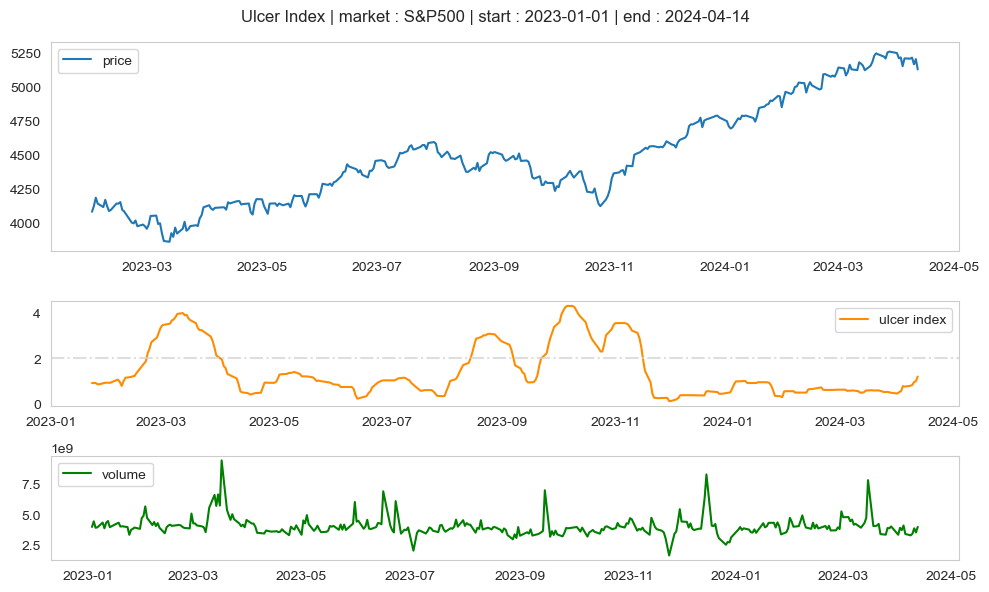

In [5]:
import matplotlib.gridspec as gridspec

plt.figure(figsize = (10, 6))
plt.subplot(3, 1, 1)
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1]) 

plt.subplot(gs[0])
plt.plot(data['Close'][19:], label = 'price')
plt.legend()
plt.grid(False)

plt.subplot(gs[1])
plt.plot(ulcer, color = 'darkorange')
plt.grid(False)
plt.axhline(y = 2, color = 'lightgray', linestyle = '-.', alpha = 0.75)
plt.legend(['ulcer index'])

plt.subplot(gs[2])
plt.plot(data['Volume'], color = 'green')
plt.grid(False)
plt.legend(['volume'])

plt.suptitle(f'Ulcer Index | market : S&P500 | start : {start_date} | end : {end_date}')
plt.tight_layout()
plt.show()